In [1]:
#add the dev version of aare
import sys
sys.path.append('/home/l_msdetect/erik/aare/build')
from aare import CtbRawFile, RawMasterFile, File, RawFile, RawSubFile, DetectorType
from aare.transform import moench05, moench05_old, moench05_1g

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

#Rendering version
from IPython.display import Markdown, display
try:
    from importlib import metadata
    v = metadata.version('aare')
except:
    v = 'dev'
    
s = f'Example run on: **{dt.now():%Y-%m-%d %H:%M}** with aare: **{v}**'
display(Markdown(s))

import time
import random
import boost_histogram as bh

Example run on: **2024-12-02 09:36** with aare: **dev**

## Doping analysis

1. Read pedestal ~1000 frames calculate mean and std
1. Read signal frame 

In [2]:
path = Path('/mnt/sls_det_storage/moench_data/xiangyu/241121_BP_3dImaging_Moench2_g4_50us')
files = [f for f in path.glob('*.json')]
files.sort(key=lambda x: float(x.name.split('_')[0].strip('HV')))

HV_list = []
pulse_list = []

for f in files:
    print(f.name, f'frames: {RawFile(f).total_frames}')
    hv, pulse,_ = f.name.split('_',2)
    hv = float(hv.strip('HV'))
    HV_list.append(hv)
    
    pulse = float(pulse.strip('pulseV'))
    pulse_list.append(pulse)
   
#Assume we have two of each
HV = np.array(HV_list[::2])
pulse = np.array(pulse_list[::2])

print(HV.size, pulse.size)

HV1.7V_pulse0.201V_dark_master_0.json frames: 1999
HV1.7V_pulse0.201V_pulsed_master_0.json frames: 2000
HV1.71V_pulse0.203V_pulsed_master_0.json frames: 1809
HV1.71V_pulse0.203V_dark_master_0.json frames: 1674
HV1.72V_pulse0.205V_pulsed_master_0.json frames: 1858
HV1.72V_pulse0.205V_dark_master_0.json frames: 1825
HV1.73V_pulse0.207V_pulsed_master_0.json frames: 1935
HV1.73V_pulse0.207V_dark_master_0.json frames: 1944
HV1.741V_pulse0.209V_pulsed_master_0.json frames: 1954
HV1.741V_pulse0.209V_dark_master_0.json frames: 2000
HV1.752V_pulse0.211V_dark_master_0.json frames: 1816
HV1.752V_pulse0.211V_pulsed_master_0.json frames: 1755
HV1.763V_pulse0.213V_pulsed_master_0.json frames: 1660
HV1.763V_pulse0.213V_dark_master_0.json frames: 1929
HV1.774V_pulse0.215V_pulsed_master_0.json frames: 1935
HV1.774V_pulse0.215V_dark_master_0.json frames: 2000
HV1.785V_pulse0.217V_pulsed_master_0.json frames: 1789
HV1.785V_pulse0.217V_dark_master_0.json frames: 1928
HV1.796V_pulse0.219V_dark_master_0.jso

HV8.031V_pulse0.743V_dark_master_0.json frames: 2000
HV8.07V_pulse0.745V_pulsed_master_0.json frames: 2000
HV8.07V_pulse0.745V_dark_master_0.json frames: 2000
HV8.109V_pulse0.748V_dark_master_0.json frames: 2000
HV8.109V_pulse0.748V_pulsed_master_0.json frames: 2000
HV8.149V_pulse0.75V_dark_master_0.json frames: 2000
HV8.149V_pulse0.75V_pulsed_master_0.json frames: 2000
HV8.189V_pulse0.752V_pulsed_master_0.json frames: 2000
HV8.189V_pulse0.752V_dark_master_0.json frames: 2000
HV8.229V_pulse0.754V_pulsed_master_0.json frames: 2000
HV8.229V_pulse0.754V_dark_master_0.json frames: 2000
HV8.269V_pulse0.756V_pulsed_master_0.json frames: 2000
HV8.269V_pulse0.756V_dark_master_0.json frames: 2000
HV8.309V_pulse0.758V_pulsed_master_0.json frames: 2000
HV8.309V_pulse0.758V_dark_master_0.json frames: 2000
HV8.349V_pulse0.76V_pulsed_master_0.json frames: 2000
HV8.349V_pulse0.76V_dark_master_0.json frames: 2000
HV8.389V_pulse0.763V_dark_master_0.json frames: 2000
HV8.389V_pulse0.763V_pulsed_master_0

HV22.317V_pulse1.307V_pulsed_master_0.json frames: 2000
HV22.317V_pulse1.307V_dark_master_0.json frames: 2000
HV22.386V_pulse1.309V_pulsed_master_0.json frames: 2000
HV22.386V_pulse1.309V_dark_master_0.json frames: 2000
HV22.456V_pulse1.312V_pulsed_master_0.json frames: 2000
HV22.456V_pulse1.312V_dark_master_0.json frames: 2000
HV22.526V_pulse1.314V_dark_master_0.json frames: 2000
HV22.526V_pulse1.314V_pulsed_master_0.json frames: 2000
HV22.596V_pulse1.316V_dark_master_0.json frames: 2000
HV22.596V_pulse1.316V_pulsed_master_0.json frames: 2000
HV22.666V_pulse1.318V_pulsed_master_0.json frames: 2000
HV22.666V_pulse1.318V_dark_master_0.json frames: 2000
HV22.736V_pulse1.32V_pulsed_master_0.json frames: 2000
HV22.736V_pulse1.32V_dark_master_0.json frames: 2000
HV22.806V_pulse1.322V_pulsed_master_0.json frames: 2000
HV22.806V_pulse1.322V_dark_master_0.json frames: 2000
HV22.876V_pulse1.325V_pulsed_master_0.json frames: 2000
HV22.876V_pulse1.325V_dark_master_0.json frames: 2000
HV22.946V_pu

HV48.076V_pulse1.558V_dark_master_0.json frames: 2000
HV48.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV48.576V_pulse1.558V_dark_master_0.json frames: 2000
HV49.076V_pulse1.558V_dark_master_0.json frames: 2000
HV49.076V_pulse1.558V_pulsed_master_0.json frames: 2000
HV49.576V_pulse1.558V_dark_master_0.json frames: 2000
HV49.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV50.076V_pulse1.558V_dark_master_0.json frames: 2000
HV50.076V_pulse1.558V_pulsed_master_0.json frames: 2000
HV50.576V_pulse1.558V_dark_master_0.json frames: 2000
HV50.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV51.076V_pulse1.558V_dark_master_0.json frames: 2000
HV51.076V_pulse1.558V_pulsed_master_0.json frames: 2000
HV51.576V_pulse1.558V_dark_master_0.json frames: 2000
HV51.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV52.076V_pulse1.558V_dark_master_0.json frames: 2000
HV52.076V_pulse1.558V_pulsed_master_0.json frames: 2000
HV52.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV52.576V_

1999
(1999, 400, 400)
0.694s


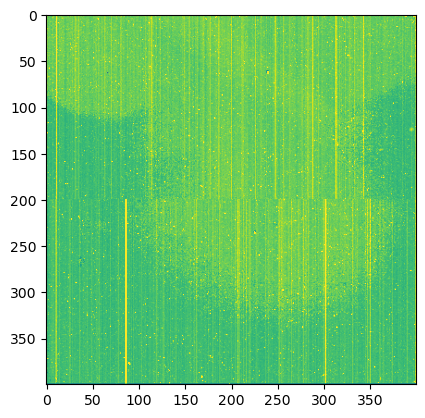

In [3]:
i = 0
fname = path / f'HV{HV[i]}V_pulse{pulse[i]}V_dark_master_0.json'

with RawFile(fname) as f:
    print(f.total_frames)
    headers, data = f.read()
# t0 = time.perf_counter()  
# data  = data.swapaxes(0,1).swapaxes(1,2).copy()
# t1 = time.perf_counter()
# print(f'{t1-t0:.3f}s')

print(data.shape)
t0 = time.perf_counter()    
# m = data.mean(axis = 2, keepdims=True)
std = data.std(axis = 0,)
t1 = time.perf_counter()
print(f'{t1-t0:.3f}s')
fig, ax = plt.subplots()
im = ax.imshow(std)
im.set_clim(0,30)


In [4]:
data  = data.swapaxes(0,1).swapaxes(1,2).copy()

In [5]:
#Processing using aare


for i in range(1):
    fname = path / f'HV{HV[i]}V_pulse{pulse[i]}V_dark_master_0.json'
    t0 = time.perf_counter()
    with RawFile(fname) as f:
        headers, data = f.read()
        dark_frame = data.mean(axis = 0)
        dark_noise = data.std(axis = 0, mean = dark_frame)
    
    fname = path / f'HV{HV[i]}V_pulse{pulse[i]}V_pulsed_master_0.json'
    with RawFile(fname) as f:
        headers, data = f.read()
        signal_frame = data.mean(axis = 0)
        signal_noise = data.std(axis = 0, mean = m)
        
    
    
    t1 = time.perf_counter()
print(f'reading {fname.name} took: {t1-t0:.3f}')

#Pure python read
# fname = fname.as_posix().replace('master_0.json', 'd0_f0_0.raw')
# data = np.fromfile(fname, dtype=np.uint16).astype(np.int32)
# data = darkFrames.reshape(-1, 400*400+56)
# data = darkFrames[:,56:].reshape(-1, 400, 400)

# mean = darkFrames.mean()
# std = darkFrames.std()

t1 = time.perf_counter()
print(f'reading took: {t1-t0:.3f}')

# HV1.7V_pulse0.201V_dark_master_0.json

NameError: name 'm' is not defined

In [ ]:
print(data[:,200,200].mean())
xmin = 9070
hist1 = bh.Histogram(bh.axis.Regular(100, -49.5+xmin, 50.5+xmin))
pixel = (400,400)
hist1.fill(data[:,200,200])
fig, ax = plt.subplots()
ax.step(hist1.axes[0].edges[:-1], hist1.values(), where="post", label = f'pixel {pixel}');
ax.set_xlabel('ADU pedestal corrected')
ax.set_ylabel('Counts [1]')
ax.grid()
ax.legend()
print(hist1.axes.edges)

In [ ]:
t0 = time.perf_counter()
mean = darkFrames.mean(axis = 0)
std = darkFrames.std(axis = 0, mean = mean)
t1 = time.perf_counter()
print(f'duration: {t1-t0:.3f}')

In [ ]:
base = Path('/mnt/sls_det_storage/highZ_data/moench03_039_Hecht_Mo17keV_22Jul2021/')
for f in base.glob('*'):
    print(f)
    
    
    

In [ ]:
fname = base/'moench03_m039_GaAs2021_LEC_g1_hg_Mo17keV_tint6us_e-190V_Tp15C_master_8.raw'
f = RawMasterFile(fname)
f.detector_type

In [ ]:
fname = base/'moench03_m039_GaAs2021_LEC_g1_hg_Mo17keV_tint6us_e-190V_Tp15C_d0_f000000000000_8.raw'
f = RawSubFile(fname, DetectorType.Moench03_old, 400, 400, 16)
img = f.read_frame()

fig, ax = plt.subplots()
im = ax.imshow(img)
im.set_clim(4600,5400)

In [ ]:
fig, ax = plt.subplots()
ax.plot(img[300,:])


In [ ]:
8+4+4+8+8+2+2+2+2+4+2+1+1+64